# Geographic Information Systems (GIS) for Python: <br>A Brief Introduction

### Map Projections

![XKCD map projections](https://imgs.xkcd.com/comics/map_projections.png)

### Different map projections  in NYC

This presentation will focus on the following map which is commonly used in NYC:

![WGS 84/EPSG: 4326](https://nycitymap.files.wordpress.com/2016/09/epsg-4326-labels1.jpg)

[Source](https://nycitymap.wordpress.com/tag/coordinate-systems/) <br>
_Why?_ Because it's what works! (Also used by GPS coordinates and OpenStreetMap.)

### GIS Data Types

**Vector**: Composed of vertices and paths
* Points: x, y coordinates (think GPS coordinates)
* Lines: lines between points (roads, rivers, pipelines)
* Polygons: used to show boundaries/units with area (zipcode, city council district)

**Raster:** Composed of pixels/grid cells
* Discrete: categorical data (land vs ocean, urban vs rural)
* Continous: continuous data (elevation, temperature, oil concentrations around an oil spill)



https://gisgeography.com/spatial-data-types-vector-raster/

### Using GeoPandas

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import scipy
import shapely
import matplotlib.pyplot as plt

In [2]:
# Read in shapefile of NYC zipcodes
gdf = gpd.read_file('../CAPSTONE/zipcodes/ZIP_CODE_040114.shp')

In [3]:
gdf.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [6]:
gdf.shape

(263, 13)

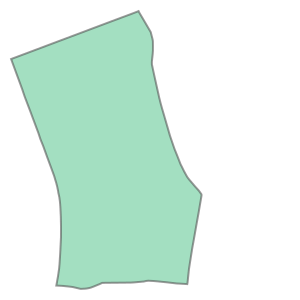

In [4]:
# Polygons!
gdf['geometry'][0]

In [5]:
# Look at the horror of polygon boundaries!
gdf['geometry'][0].exterior.coords.xy

(array('d', [1038098.2518714815, 1038141.9358392209, 1038171.28978315, 1038280.1517701447, 1038520.8530603945, 1038764.2265893966, 1039008.3583189845, 1039251.8240393996, 1039504.4879041463, 1039757.4201410562, 1039853.95275639, 1039876.9028417319, 1039898.1567362249, 1040001.0243126452, 1040114.1956742257, 1040244.262015149, 1040360.0363898873, 1040487.856344223, 1040731.019571811, 1040974.3944131434, 1041221.4418193102, 1041374.3401355594, 1041391.6599828154, 1041406.9325900674, 1041423.3105100542, 1041589.3121465594, 1041715.3253459781, 1041723.9933076501, 1041729.6816164851, 1041737.8036474735, 1041764.2228859812, 1041774.4886134714, 1041778.719904229, 1041780.2553342283, 1041780.8941124827, 1041777.4252873957, 1041775.9295554757, 1041753.3515166491, 1041753.2521073967, 1041752.7589981407, 1041755.517194733, 1041776.3193184733, 1041779.9052693099, 1041798.762515068, 1041804.4488554001, 1041861.1646212339, 1041865.1908598989, 1041915.5877407342, 1041940.4804074764, 1041978.429806649

In [6]:
# And assorted other shapely attributes! https://shapely.readthedocs.io/en/stable/manual.html
gdf['geometry'].centroid

0      POINT (1040696.262 185580.222)
1      POINT (1001912.872 183803.113)
2      POINT (1008365.375 180768.945)
3       POINT (997023.193 180870.353)
4       POINT (990785.291 173656.048)
                    ...              
258     POINT (952154.316 170046.546)
259    POINT (1028655.626 168862.387)
260     POINT (994553.979 199049.368)
261     POINT (997735.194 219676.997)
262     POINT (986369.731 212984.165)
Length: 263, dtype: geometry

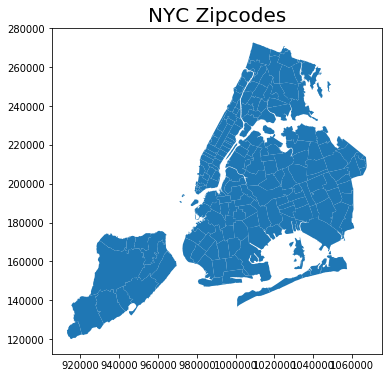

In [7]:
# Note the gobbledygook coordinates
fig, ax = plt.subplots(figsize = (6, 6))
gdf.plot(ax = ax);
ax.set_title('NYC Zipcodes', fontsize = 20);

In [8]:
# Read in NYC Hospital Facility data
hospdf = pd.read_csv('../CAPSTONE/data/NYC_Health___Hospitals_Facilities_-_2011.csv')

In [9]:
hospdf.head()

,Facility Type,Borough,Facility Name,Cross Streets,Phone,Location 1,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,Child Health Center,Brooklyn,Ida G. Israel Community Health Center,W. 22nd St. & W. 23rd St.,718-946-3400,"2201 Neptune Avenue\nBrooklyn, NY 11224\n(40.5...",11224.0,40.578468,-73.989614,13.0,47.0,348.0,3188417.0,3.069900e+09,Seagate-Coney Island ...
1,Child Health Center,Queens,South Queens Community Health Center,NaN,718-883-6699,"114 02 Guy R Brewer Blvd\nJamaica, NY 11434\n(...",11434.0,40.688615,-73.785593,12.0,28.0,276.0,4264631.0,4.122000e+09,Baisley Park ...
2,Child Health Center,Bronx,Melrose Houses Child Health Clinic,between Morris Ave. & Courtlandt Ave.,718-292-2820,"348 156th Street\nBronx, NY 10451\n(40.8213011...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Child Health Center,Bronx,Daniel Webster Houses Child Health Clinic,corner of Webster Ave.,718-538-2147,"401 168th Street\nBronx, NY 10456\n(40.8322798...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Diagnostic & Treatment Center,Bronx,Segundo Ruiz Belvis Diagnostic & Treatment Center,NaN,718-579-4000,"545 142nd Street\nBronx, NY 10454\n(40.8101218...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Convert Pandas dataframe to GeoPandas dataframe 
# (A GeoPandas Dataframe is a Pandas Dataframe with a geometry column)
hosp_gdf = gpd.GeoDataFrame(hospdf, 
                            geometry=gpd.points_from_xy(hospdf.Longitude, 
                                                        hospdf.Latitude)) 
#                            crs = {'init':'epsg:4326', 'no_defs':True})

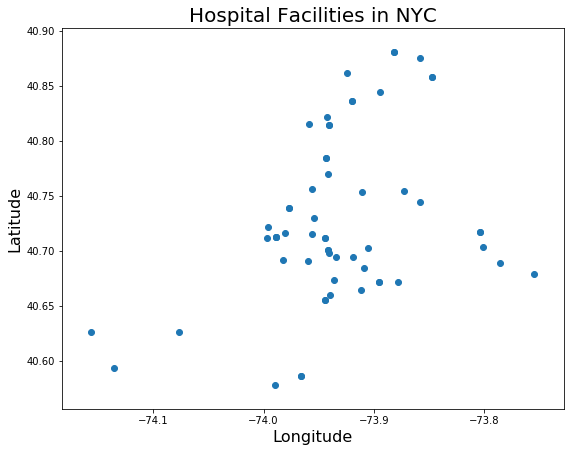

In [11]:
# Plot gridded hospital locations
hosp_gdf.plot(figsize = (9,9));
plt.title('Hospital Facilities in NYC', fontsize = 20);
plt.xlabel('Longitude', fontsize = 16);
plt.ylabel('Latitude', fontsize = 16);

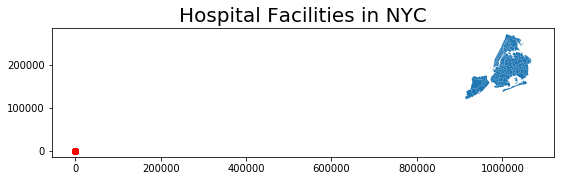

In [12]:
# Note this extremely informative figure
fig, ax = plt.subplots(figsize = (9,9))
gdf.plot(ax = ax);
hosp_gdf.plot(ax = ax, color = 'r');
ax.set_title('Hospital Facilities in NYC', fontsize = 20);


In [13]:
# NYC zipcodes projected to a coordinate reference system
gdf = gpd.read_file('../CAPSTONE/zipcodes/ZIP_CODE_040114.shp').to_crs(epsg=4326)

In [14]:
gdf.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.93740 40.67973, -73.93487 40.679..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.90294 40.67084, -73.90223 40.668..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.95797 40.67066, -73.95576 40.670..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.97208 40.65060, -73.97192 40.650..."


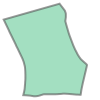

In [15]:
# Polygons!
gdf['geometry'][0]

In [16]:
gdf['geometry'][0].exterior.coords.xy

(array('d', [-73.80584847647394, -73.80569084187867, -73.80558491738391, -73.80519208513209, -73.80432350431623, -73.80344526934498, -73.80256429248011, -73.8016857135081, -73.80077393772204, -73.79986118047653, -73.79951282470476, -73.79943000556948, -73.79935330467507, -73.798982084801, -73.7985736740486, -73.79810429772554, -73.79768649518888, -73.79722521981566, -73.7963476930964, -73.79546939850097, -73.79457785141184, -73.79402605136845, -73.79396353746253, -73.79390841279687, -73.79384965258745, -73.79325349202304, -73.79280097961777, -73.79276986289744, -73.7927495258889, -73.79272053476551, -73.7926261366266, -73.79258952112383, -73.79257450383177, -73.79256939019211, -73.79256880529518, -73.79258158773969, -73.79258728533075, -73.7926704923892, -73.79267114801, -73.79267323632763, -73.79266340595551, -73.79258924146541, -73.79257645674525, -73.79250922684331, -73.79248894892055, -73.79228664806945, -73.79227229354522, -73.79209251655749, -73.7920037328603, -73.79186822208906,

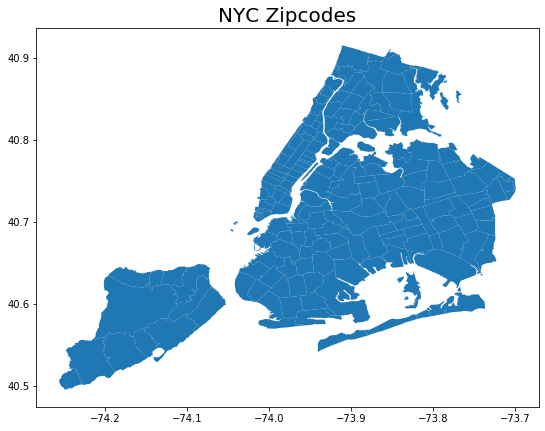

In [17]:
fig, ax = plt.subplots(figsize = (9, 9))
gdf.plot(ax = ax);
ax.set_title('NYC Zipcodes', fontsize = 20);

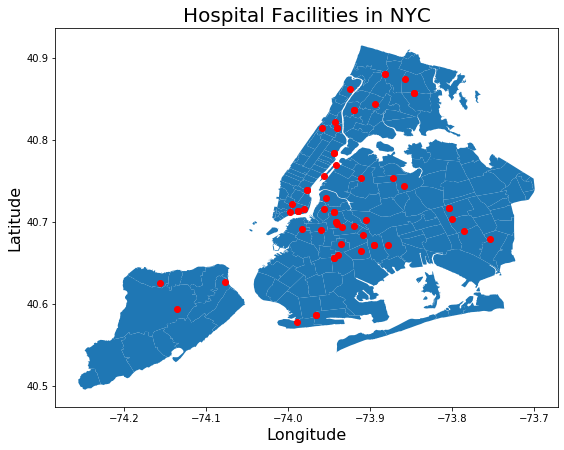

In [18]:
fig, ax = plt.subplots(figsize = (9,9))
gdf.plot(ax = ax);
hosp_gdf.plot(ax = ax, color = 'r');
ax.set_title('Hospital Facilities in NYC', fontsize = 20)
ax.set_xlabel('Longitude', fontsize = 16);
ax.set_ylabel('Latitude', fontsize = 16);

In [19]:
# Convert zipcodes to int type
gdf = gdf.astype({'ZIPCODE': 'int32'})

In [20]:
# Drop NaNs from hospital dataset and convert zipcodes to int type
hosp_gdf.dropna(subset = ['Latitude'], inplace = True)
hosp_gdf = hosp_gdf.astype({'Postcode': 'int32'})

In [21]:
# Groupby zipcode/postcode to get # hospitals per zip & remove extra geometry column
hosp_agg = hosp_gdf.groupby('Postcode').count().drop(columns=['geometry'])

In [22]:
hosp_agg.head()

,Facility Type,Borough,Facility Name,Cross Streets,Phone,Location 1,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
Postcode,,,,,,,,,,,,,,
10002,4,4,4,1,4,4,4,4,4,4,4,4,4,4
10012,1,1,1,0,1,1,1,1,1,1,1,1,1,1
10016,2,2,2,0,2,2,2,2,2,2,2,2,2,2
10027,1,1,1,0,1,1,1,1,1,1,1,1,1,1
10029,2,2,2,0,2,2,2,2,2,2,2,2,2,2


In [23]:
# Merge hospital data with zipcode polygons for easy plotting
gdf_merge = hosp_agg.merge(gdf, left_on = 'Postcode', right_on = 'ZIPCODE')

In [24]:
# Create Gepandas DataFrame from merged data
gdf_geo = gpd.GeoDataFrame(gdf_merge, geometry = gdf_merge.geometry, 
                            crs = {'init':'epsg:4326', 'no_defs':True})

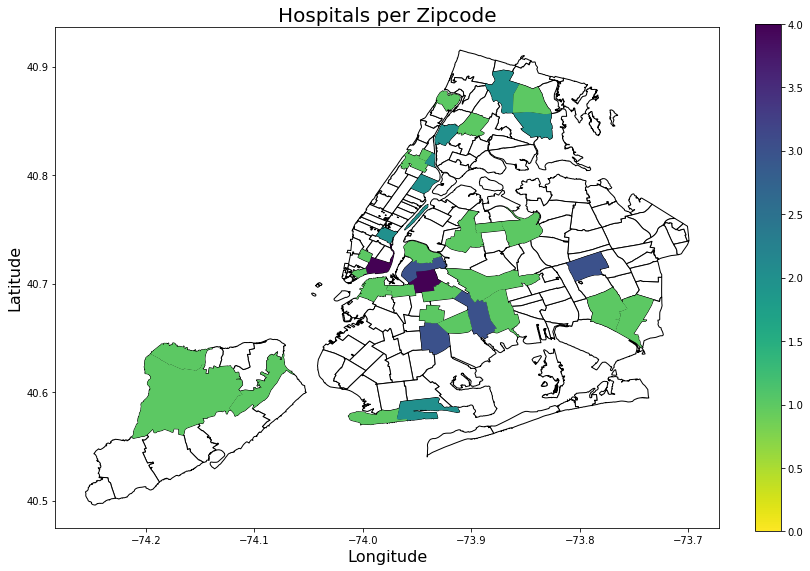

In [25]:
# Plot # of hospitals per zip
fig, ax = plt.subplots(figsize = (13, 13))
gdf.plot(ax=ax, color='white', edgecolor='black')
gdf_geo.plot('Facility Type', legend=True, ax=ax,  # All df columns are identical
             cmap='viridis_r', legend_kwds={'fraction':.035}, # Scale legend height to plot
             vmin = 0)
ax.set_title('Hospitals per Zipcode', fontsize = 20)
ax.set_xlabel('Longitude', fontsize = 16)
ax.set_ylabel('Latitude', fontsize = 16)
plt.show()


### P.S.

In [26]:
emsdf = pd.read_csv('../CAPSTONE/data/EMS_Incident_Dispatch_Data.csv', nrows = 100_000)
pd.set_option('display.max_columns', 40)

In [27]:
emsdf.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,FIRST_TO_HOSP_DATETIME,FIRST_HOSP_ARRIVAL_DATETIME,INCIDENT_CLOSE_DATETIME,HELD_INDICATOR,INCIDENT_DISPOSITION_CODE,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,REOPEN_INDICATOR,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR
0,183654386,12/31/2018 11:59:46 PM,CARDBR,2,CARDBR,2,12/31/2018 11:59:54 PM,Y,8,01/01/2019 12:00:51 AM,01/01/2019 12:07:27 AM,Y,461.0,453.0,01/01/2019 12:15:08 AM,01/01/2019 12:21:51 AM,01/01/2019 01:00:20 AM,N,82.0,BROOKLYN,K6,11201.0,84.0,35.0,302.0,13.0,8.0,N,N,N,N
1,183654385,12/31/2018 11:59:20 PM,MVAINJ,4,MVAINJ,4,01/01/2019 12:01:10 AM,Y,110,01/01/2019 12:02:25 AM,01/01/2019 12:07:19 AM,Y,479.0,369.0,NaN,NaN,01/01/2019 12:19:49 AM,N,91.0,QUEENS,Q3,11416.0,102.0,32.0,409.0,27.0,7.0,N,N,N,N
2,183654384,12/31/2018 11:58:45 PM,SICK,6,SICK,6,01/01/2019 12:00:43 AM,Y,118,01/01/2019 12:02:08 AM,01/01/2019 12:14:18 AM,Y,933.0,815.0,01/01/2019 12:23:59 AM,01/01/2019 12:34:07 AM,01/01/2019 01:21:30 AM,N,82.0,QUEENS,Q6,11369.0,115.0,21.0,480.0,30.0,14.0,N,N,N,N
3,183654383,12/31/2018 11:58:14 PM,INJMAJ,3,INJMAJ,3,12/31/2018 11:58:22 PM,Y,8,12/31/2018 11:58:37 PM,01/01/2019 12:04:10 AM,Y,356.0,348.0,01/01/2019 01:06:29 AM,01/01/2019 01:15:30 AM,01/01/2019 02:02:12 AM,N,82.0,BROOKLYN,K1,11214.0,62.0,47.0,311.0,20.0,11.0,N,N,N,N
4,183654382,12/31/2018 11:57:42 PM,UNC,2,UNC,2,01/01/2019 12:00:39 AM,Y,177,01/01/2019 12:01:03 AM,01/01/2019 12:15:00 AM,Y,1038.0,861.0,01/01/2019 01:18:22 AM,01/01/2019 01:22:01 AM,01/01/2019 02:34:19 AM,N,82.0,MANHATTAN,M3,10019.0,18.0,4.0,105.0,2.0,12.0,N,N,N,N


In [28]:
emsdf.dropna(subset = ['ZIPCODE'], inplace = True)

In [29]:
emsdf = emsdf.astype({'ZIPCODE': 'int32'})

In [30]:
# How many 87 codes do we have?
emsdf[emsdf['INCIDENT_DISPOSITION_CODE'] == 87].shape

(2334, 31)

In [31]:
# Isolate out our canceled calls
emsdf_can = emsdf[emsdf['INCIDENT_DISPOSITION_CODE'] == 87.0]

In [32]:
# Merge our EMS dataframe with the zipcode shapefile
gdf_ems = emsdf_can.groupby('ZIPCODE').count().merge(gdf, on = 'ZIPCODE')

In [33]:
# Note that our EMS dataframe now contains that essential geometry column
gdf_ems.head()

,ZIPCODE,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,FIRST_TO_HOSP_DATETIME,FIRST_HOSP_ARRIVAL_DATETIME,INCIDENT_CLOSE_DATETIME,HELD_INDICATOR,INCIDENT_DISPOSITION_CODE,...,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,REOPEN_INDICATOR,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,10001,30,30,30,30,30,30,30,30,30,30,11,30,11,11,0,0,30,30,30,...,30,30,30,30,30,30,30,30,0,New York,22413.0,1.779494e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((-74.00827 40.75259, -74.00819 40.752..."
1,10002,22,22,22,22,22,22,22,22,22,22,7,22,7,7,0,0,22,22,22,...,22,22,22,22,22,22,22,22,0,New York,81305.0,2.628013e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.97442 40.73642, -73.97445 40.736..."
2,10003,19,19,19,19,19,19,19,19,19,18,6,19,6,6,0,0,19,19,19,...,19,19,19,19,19,19,19,19,0,New York,55878.0,1.553838e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.97986 40.73497, -73.98028 40.734..."
3,10004,5,5,5,5,5,5,5,5,5,5,2,5,2,2,0,0,5,5,5,...,5,5,5,5,5,5,5,5,0,New York,2187.0,4.002521e+06,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((-74.01101 40.70622, -74.00997 40.705..."
4,10004,5,5,5,5,5,5,5,5,5,5,2,5,2,2,0,0,5,5,5,...,5,5,5,5,5,5,5,5,0,New York,2187.0,1.202708e+06,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((-74.04166 40.69645, -74.04237 40.697..."


In [34]:
# It has the geometry column, but it isn't a GeoPandas dataframe yet!
type(gdf_ems)

pandas.core.frame.DataFrame

In [35]:
gdf_emsgeo = gpd.GeoDataFrame(gdf_ems, geometry = gdf_ems.geometry, 
                            crs = {'init':'epsg:4326', 'no_defs':True})

In [36]:
# Now a GeoPandas dataframe!
type(gdf_emsgeo)

geopandas.geodataframe.GeoDataFrame

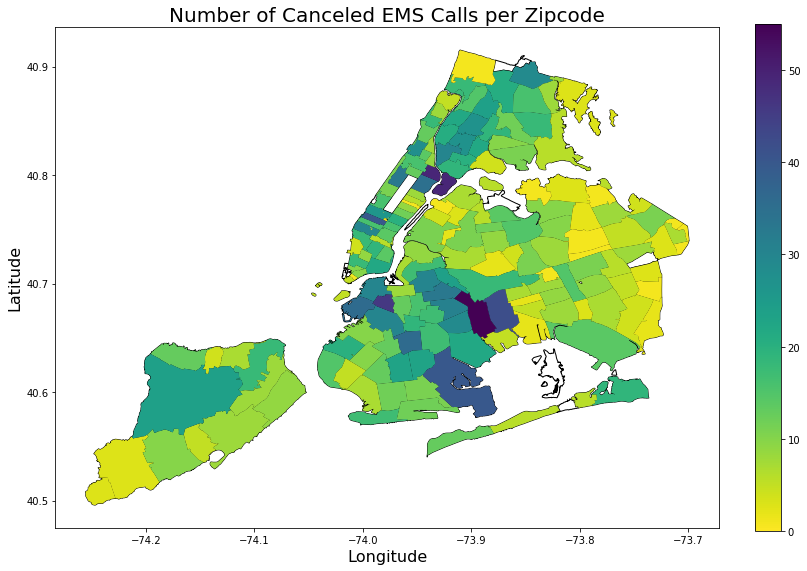

In [37]:
# Plot # of canceled calls per zip

fig, ax = plt.subplots(figsize = (13, 13))
gdf.plot(ax=ax, color='white', edgecolor='black')
gdf_emsgeo.plot('CAD_INCIDENT_ID', legend=True, ax=ax, 
                cmap='viridis_r', legend_kwds={'fraction':.035},
                vmin = 0)
ax.set_title('Number of Canceled EMS Calls per Zipcode', fontsize = 20)
ax.set_xlabel('Longitude', fontsize = 16)
ax.set_ylabel('Latitude', fontsize = 16)
plt.show()

### PPS

In [38]:
emsdf.groupby('INCIDENT_DISPOSITION_CODE').count()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,FIRST_TO_HOSP_DATETIME,FIRST_HOSP_ARRIVAL_DATETIME,INCIDENT_CLOSE_DATETIME,HELD_INDICATOR,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,REOPEN_INDICATOR,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR
INCIDENT_DISPOSITION_CODE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
82.0,69067,69067,69067,69067,69067,69067,69067,69067,69067,69013,68038,69067,68038,68038,68868,68439,69067,69067,69067,69067,69067,69067,69067,69067,69038,69067,69067,69067,69067,69067
83.0,723,723,723,723,723,723,723,723,723,723,719,723,719,719,1,1,723,723,723,723,723,723,722,723,723,722,723,723,723,723
87.0,2334,2334,2334,2334,2334,2334,2334,2334,2334,2294,1204,2334,1204,1204,7,5,2333,2334,2334,2334,2334,2334,2334,2334,2330,2334,2334,2334,2334,2334
90.0,7810,7810,7810,7810,7810,7810,7810,7810,7810,7803,7633,7810,7633,7633,4,4,7810,7810,7810,7810,7810,7810,7809,7810,7797,7809,7810,7810,7810,7810
91.0,1868,1868,1868,1868,1868,1868,1868,1868,1868,1864,1839,1868,1825,1839,1,0,1868,1868,1868,1868,1868,1868,1868,1868,1864,1868,1868,1868,1868,1868
92.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3
93.0,12337,12337,12337,12337,12337,12337,12337,12337,12337,12321,12174,12337,12174,12174,134,96,12337,12337,12337,12337,12337,12337,12337,12337,12332,12337,12337,12337,12337,12337
94.0,84,84,84,84,84,84,84,84,84,84,83,84,83,83,1,1,84,84,84,84,84,84,84,84,84,84,84,84,84,84
95.0,11,11,11,11,11,11,11,11,11,11,11,11,11,11,0,0,11,11,11,11,11,11,11,11,11,11,11,11,11,11


In [39]:
# To get normalized counts of canceled calls/total calls per zip
ems_prop = (emsdf.groupby(['INCIDENT_DISPOSITION_CODE', 'ZIPCODE']).count())/(emsdf.groupby('ZIPCODE').count())

In [40]:
# To pull out just my '87' disposition codes
ems_prop = ems_prop.T[87].T.reset_index()

In [41]:
gdf_ems = ems_prop.merge(gdf, on = 'ZIPCODE')

In [42]:
gdf_emsgeo = gpd.GeoDataFrame(gdf_ems, geometry = gdf_ems.geometry, 
                            crs = {'init':'epsg:4326', 'no_defs':True})

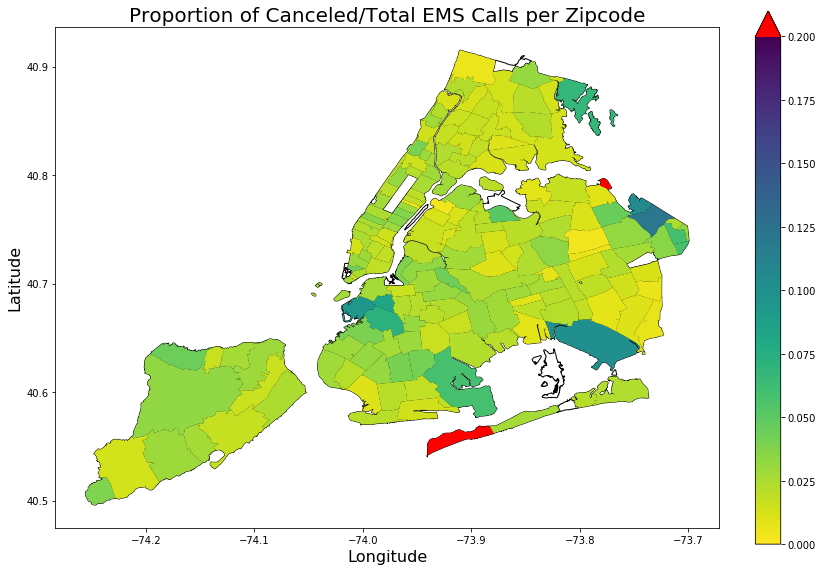

In [43]:
fig, ax = plt.subplots(figsize = (13, 13))
vmin, vmax = 0, 0.2
cmap = plt.cm.viridis_r
cmap.set_over('red')
gdf.plot(ax=ax, color='white', edgecolor='black')
gdf_emsgeo.plot('CAD_INCIDENT_ID', legend=True, ax=ax, 
                cmap=cmap,legend_kwds={'fraction':.035, 'extend':'max'},
                vmin = vmin, vmax = vmax)
ax.set_title('Proportion of Canceled/Total EMS Calls per Zipcode', fontsize = 20)
ax.set_xlabel('Longitude', fontsize = 16)
ax.set_ylabel('Latitude', fontsize = 16)
plt.show()